In [2]:
import json

def read_squad(path):
    # open JSON file and load intro dictionary
    with open(path, 'rb') as f:
        squad_dict = json.load(f)

    # initialize lists for contexts, questions, and answers
    contexts = []
    questions = []
    answers = []
    # iterate through all data in squad data
    for group in squad_dict['data']:
        for passage in group['paragraphs']:
            context = passage['context']
            for qa in passage['qas']:
                question = qa['question']
                # check if we need to be extracting from 'answers' or 'plausible_answers'
                if 'plausible_answers' in qa.keys():
                    access = 'plausible_answers'
                else:
                    access = 'answers'
                for answer in qa[access]:
                    # append data to lists
                    contexts.append(context)
                    questions.append(question)
                    answers.append(answer)
    # return formatted data lists
    return contexts, questions, answers

In [3]:
# execute our read SQuAD function for training and validation sets
train_contexts_old, train_questions_old, train_answers_old = read_squad('squad/train-v2.0.json')

In [4]:
with open("test-indexes.json", 'r') as testfile:
    rand_i_test = json.load(testfile)

In [5]:
import json

with open("tokenized-features-final-ints.json", 'r') as f:
    features = json.load(f)

In [6]:
# Pad features
for f in features:
    f += [[0,0,0,0]] * (512 - len(f))

In [7]:
test_features = []
for i in rand_i_test:
    test_features.append(features[i])

In [8]:
test_contexts = []
test_questions = []
test_answers = []

for i in rand_i_test:
    test_contexts.append(train_contexts_old[i])
    test_questions.append(train_questions_old[i])
    test_answers.append(train_answers_old[i])

In [9]:
def normalize_text(s):
    """Removing articles and punctuation, and standardizing whitespace are all typical text processing steps."""
    import string, re

    def remove_articles(text):
        regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
        return re.sub(regex, " ", text)

    def white_space_fix(text):
        return " ".join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s))))

## What Questions

In [10]:
what_contexts = []
what_questions = []
what_answers = []
what_features = []

for i in range(len(test_questions)):
    q_words = test_questions[i].split(' ')
    q_words_lower = [normalize_text(word) for word in q_words]
    if q_words_lower[0] == 'what' or  q_words_lower[0] == 'whats' or  q_words_lower[0] == 'whatre':
        what_contexts.append(test_contexts[i])
        what_questions.append(test_questions[i])
        what_answers.append(test_answers[i])
        what_features.append(test_features[i])
    elif q_words_lower[0] != 'who' and q_words_lower[0] != 'how' and q_words_lower[0] != 'why' and ('what' in q_words_lower or 'whats' in q_words_lower or 'whatre' in q_words_lower):
        what_contexts.append(test_contexts[i])
        what_questions.append(test_questions[i])
        what_answers.append(test_answers[i])
        what_features.append(test_features[i])

## Where Questions

In [11]:
where_contexts = []
where_questions = []
where_answers = []
where_features = []

for i in range(len(test_questions)):
    q_words = test_questions[i].split(' ')
    q_words_lower = [normalize_text(word) for word in q_words]
    if q_words_lower[0] == 'where':
        where_contexts.append(test_contexts[i])
        where_questions.append(test_questions[i])
        where_answers.append(test_answers[i])
        where_features.append(test_features[i])
    elif q_words_lower[0] != 'who' and q_words_lower[0] != 'what' and 'what' not in q_words_lower and 'whats' not in q_words_lower and 'whatre' not in q_words_lower and q_words_lower[0] != 'how' and q_words_lower[0] != 'why' and 'where' in q_words_lower:
        where_contexts.append(test_contexts[i])
        where_questions.append(test_questions[i])
        where_answers.append(test_answers[i])
        where_features.append(test_features[i])

## When Questions

In [12]:
when_contexts = []
when_questions = []
when_answers = []
when_features = []

for i in range(len(test_questions)):
    q_words = test_questions[i].split(' ')
    q_words_lower = [normalize_text(word) for word in q_words]
    if q_words_lower[0] == 'when' and 'what' not in q_words_lower and 'where' not in q_words_lower and 'whom' not in q_words_lower and 'who' not in q_words_lower and 'how' not in q_words_lower:
        when_contexts.append(test_contexts[i])
        when_questions.append(test_questions[i])
        when_answers.append(test_answers[i])
        when_features.append(test_features[i])
    elif q_words_lower[0] != 'who' and 'who' not in q_words_lower and q_words_lower[0] != 'whose' and 'whom' not in q_words_lower and q_words_lower[0] != 'where' and 'where' not in q_words_lower and q_words_lower[0] != 'what' and 'what' not in q_words_lower and 'whats' not in q_words_lower and 'whatre' not in q_words_lower and q_words_lower[0] != 'how' and 'how' not in q_words_lower and q_words_lower[0] != 'why' and 'when' in q_words_lower:
        when_contexts.append(test_contexts[i])
        when_questions.append(test_questions[i])
        when_answers.append(test_answers[i])
        when_features.append(test_features[i])

## Why Questions

In [13]:
why_contexts = []
why_questions = []
why_answers = []
why_features = []

for i in range(len(test_questions)):
    q_words = test_questions[i].split(' ')
    q_words_lower = [normalize_text(word) for word in q_words]
    if q_words_lower[0] == 'why':
        why_contexts.append(test_contexts[i])
        why_questions.append(test_questions[i])
        why_answers.append(test_answers[i])
        why_features.append(test_features[i])
    elif q_words_lower[0] != 'who' and q_words_lower[0] != 'what' and 'what' not in q_words_lower and 'whats' not in q_words_lower and 'whatre' not in q_words_lower and q_words_lower[0] != 'how' and 'why' in q_words_lower:
        why_contexts.append(test_contexts[i])
        why_questions.append(test_questions[i])
        why_answers.append(test_answers[i])
        why_features.append(test_features[i])

## How Question

In [14]:
how_contexts = []
how_questions = []
how_answers = []
how_features = []

for i in range(len(test_questions)):
    q_words = test_questions[i].split(' ')
    q_words_lower = [normalize_text(word) for word in q_words]
    if q_words_lower[0] == 'how':
        how_contexts.append(test_contexts[i])
        how_questions.append(test_questions[i])
        how_answers.append(test_answers[i])
        how_features.append(test_features[i])
    elif q_words_lower[0] != 'who' and q_words_lower[0] != 'whos' and q_words_lower[0] != 'what' and 'what' not in q_words_lower and 'whats' not in q_words_lower and 'whatre' not in q_words_lower and q_words_lower[0] != 'why' and 'how' in q_words_lower:
        how_contexts.append(test_contexts[i])
        how_questions.append(test_questions[i])
        how_answers.append(test_answers[i])
        how_features.append(test_features[i])

## Who Questions

In [15]:
who_contexts = []
who_questions = []
who_answers = []
who_features = []

for i in range(len(test_questions)):
    q_words = test_questions[i].split(' ')
    q_words_lower = [normalize_text(word) for word in q_words]
    if q_words_lower[0] == 'who':
        who_contexts.append(test_contexts[i])
        who_questions.append(test_questions[i])
        who_answers.append(test_answers[i])
        who_features.append(test_features[i])
    elif q_words_lower[0] != 'where' and q_words_lower[0] != 'what' and 'what' not in q_words_lower and 'whats' not in q_words_lower and 'whatre' not in q_words_lower and q_words_lower[0] != 'why' and q_words_lower[0] != 'how' and 'how' not in q_words_lower and 'who' in q_words_lower:
        who_contexts.append(test_contexts[i])
        who_questions.append(test_questions[i])
        who_answers.append(test_answers[i])
        who_features.append(test_features[i])

## Whom Questions

In [16]:
whom_contexts = []
whom_questions = []
whom_answers = []
whom_features = []

for i in range(len(test_questions)):
    q_words = test_questions[i].split(' ')
    q_words_lower = [normalize_text(word) for word in q_words]
    if q_words_lower[0] == 'whom':
        whom_contexts.append(test_contexts[i])
        whom_questions.append(test_questions[i])
        whom_answers.append(test_answers[i])
        whom_features.append(test_features[i])
    elif q_words_lower[0] != 'what' and 'whom' in q_words_lower:
        whom_contexts.append(test_contexts[i])
        whom_questions.append(test_questions[i])
        whom_answers.append(test_answers[i])
        whom_features.append(test_features[i])

## Which Questions

In [17]:
which_contexts = []
which_questions = []
which_answers = []
which_features = []

for i in range(len(test_questions)):
    q_words = test_questions[i].split(' ')
    q_words_lower = [normalize_text(word) for word in q_words]
    if q_words_lower[0] == 'which':
        which_contexts.append(test_contexts[i])
        which_questions.append(test_questions[i])
        which_answers.append(test_answers[i])
        which_features.append(test_features[i])
    elif q_words_lower[0] != 'who' and q_words_lower[0] != 'how' and q_words_lower[0] != 'what' and 'what' not in q_words_lower and 'which' in q_words_lower:
        which_contexts.append(test_contexts[i])
        which_questions.append(test_questions[i])
        which_answers.append(test_answers[i])
        which_features.append(test_features[i])

## Whose Questions

In [18]:
whose_contexts = []
whose_questions = []
whose_answers = []
whose_features = []

for i in range(len(test_questions)):
    q_words = test_questions[i].split(' ')
    q_words_lower = [normalize_text(word) for word in q_words]
    if q_words_lower[0] == 'whose':
        whose_contexts.append(test_contexts[i])
        whose_questions.append(test_questions[i])
        whose_answers.append(test_answers[i])
        whose_features.append(test_features[i])
    elif q_words_lower[0] != 'what' and 'whose' in q_words_lower:
        whose_contexts.append(test_contexts[i])
        whose_questions.append(test_questions[i])
        whose_answers.append(test_answers[i])
        whose_features.append(test_features[i])

## Check

In [19]:
sum_of_types = len(what_contexts)+len(where_contexts)+len(when_contexts)+len(why_contexts)+len(how_contexts)+len(who_contexts)+len(whom_contexts)+len(whose_contexts)+len(which_contexts)

In [20]:
all_q = len(test_contexts)

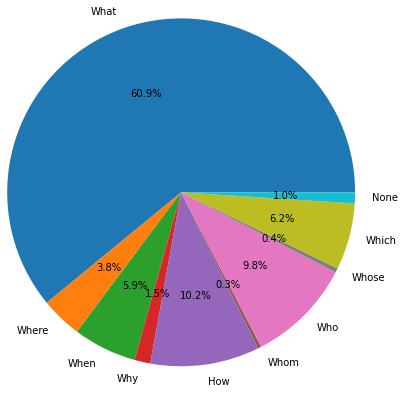

In [21]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([len(what_contexts), len(where_contexts), len(when_contexts), len(why_contexts), len(how_contexts),
              len(whom_contexts), len(who_contexts), len(whose_contexts), len(which_contexts), all_q - sum_of_types])
mylabels = ["What", "Where", "When", "Why", "How", "Whom", "Who", "Whose", "Which", "None"]

plt.pie(y, labels = mylabels, radius=2, autopct='%1.1f%%')
plt.show() 